In [1]:
import requests
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# use python simple server to serve json

URL_SENSOR =  "http://localhost:8000/quiz-export.json"
URL_LOCATION =  "http://localhost:8000/quiz-location-export.json"

# sensor

In [3]:
r_s = requests.get(url = URL_SENSOR)
data_s = r_s.json()

In [4]:
tmp_data = []

for key in data_s.keys():
    if 'DevEUI_uplink' in data_s[key].keys():
        uplink = data_s[key]['DevEUI_uplink']
        try:
            tmp_data.append({
                "lat": uplink['LrrLAT'],
                "lng": uplink['LrrLON'],
                "time": ' '.join(uplink['Time'].split('.')[0].split('T')),
                "date": uplink['Time'].split('.')[0].split('T')[0],
                "isoTime": uplink['Time'],
                "pm25": int(uplink['payload_hex'][2:4], 16)
            })
        except:
            print(key, uplink)
print(tmp_data)

-Lwgt--mVCqAfVvk9ViD {'ADRbit': '1', 'Channel': 'LC6', 'CustomerData': {'alr': {'pro': 'LORA/Generic', 'ver': '1'}}, 'CustomerID': '1100008601', 'DevAddr': 'E01B8A82', 'DevEUI': 'AA00DBCA14EF1421', 'DevLrrCnt': '1', 'FCntDn': '1', 'FCntUp': '2', 'InstantPER': '0.000000', 'Late': '0', 'Lrcid': '00000231', 'LrrLAT': '13.844980', 'LrrLON': '100.584175', 'LrrRSSI': '-118.000000', 'LrrSNR': '-8.750000', 'Lrrid': '10000787', 'Lrrs': {'Lrr': [{'Chain': '0', 'LrrESP': '-127.293648', 'LrrRSSI': '-118.000000', 'LrrSNR': '-8.750000', 'Lrrid': '10000787'}]}, 'MType': '2', 'MeanPER': '0.000000', 'ModelCfg': '0', 'SpFact': '10', 'SubBand': 'G1', 'Time': '2019-12-22T16:15:35.999+07:00', 'mic_hex': '7b932131'}
-Lwgv1t6_fgk70sP93u9 {'ADRbit': '1', 'Channel': 'LC2', 'CustomerData': {'alr': {'pro': 'LORA/Generic', 'ver': '1'}}, 'CustomerID': '1100008601', 'DevAddr': 'E01B8A82', 'DevEUI': 'AA00DBCA14EF1421', 'DevLrrCnt': '1', 'FCntDn': '1', 'FCntUp': '1', 'InstantPER': '0.000000', 'Late': '0', 'Lrcid': '0

In [5]:
data_sensor = pd.DataFrame(tmp_data)

In [6]:
data_sensor

lat         lng                 time        date  \
0    13.836809  100.530807  2019-12-19 09:51:45  2019-12-19   
1    13.836794  100.530830  2019-12-19 09:53:30  2019-12-19   
2    13.836771  100.530838  2019-12-19 09:56:05  2019-12-19   
3    13.836788  100.530823  2019-12-19 09:57:50  2019-12-19   
4    13.836770  100.530838  2019-12-19 10:01:16  2019-12-19   
..         ...         ...                  ...         ...   
949  19.027573   99.891441  2020-01-05 22:17:58  2020-01-05   
950  19.027588   99.891434  2020-01-05 22:21:13  2020-01-05   
951  19.027588   99.891434  2020-01-05 22:21:23  2020-01-05   
952  19.027636   99.891411  2020-01-05 22:23:10  2020-01-05   
953  19.027636   99.891411  2020-01-05 22:23:20  2020-01-05   

                           isoTime  pm25  
0    2019-12-19T09:51:45.312+07:00    14  
1    2019-12-19T09:53:30.818+07:00     4  
2     2019-12-19T09:56:05.09+07:00     4  
3    2019-12-19T09:57:50.554+07:00     4  
4    2019-12-19T10:01:16.019+07:00     5  
..                             ...   ...  
949  2020-01-05T22:17:58.483+07:00     1  
950   2020-01-05T22:21:13.32+07:00     1  
951   2020-01-05T22:21:23.32+07:00     1  
952   2020-01-05T22:23:10.27+07:00     1  
953   2020-01-05T22:23:20.27+07:00     1  

[954 rows x 6 columns]

In [7]:
data_sensor.describe()

pm25
count  954.000000
mean    30.354298
std     63.049359
min      0.000000
25%      1.000000
50%      4.000000
75%     10.000000
max    191.000000

In [8]:
# clear error data (191 value)
data_sensor = data_sensor[data_sensor['pm25'] != 191]

In [9]:
sns.set(style="white", context="talk")
time_series = pd.to_datetime(data_sensor['isoTime'].astype('datetime64[ns]'))
data_sensor['time'] = time_series
df = data_sensor.set_index('time')

C:\Users\mytop\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [10]:
df.groupby(pd.Grouper(level='time',freq='H')).mean().dropna()

pm25
time                          
2019-12-19 02:00:00   6.500000
2019-12-19 03:00:00   5.000000
2019-12-20 02:00:00   5.200000
2019-12-20 11:00:00   5.000000
2019-12-20 12:00:00   1.500000
...                        ...
2020-01-05 06:00:00   1.285714
2020-01-05 07:00:00   3.478261
2020-01-05 09:00:00   4.000000
2020-01-05 14:00:00  11.000000
2020-01-05 15:00:00   1.000000

[96 rows x 1 columns]

C:\Users\mytop\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'PM 2.5')

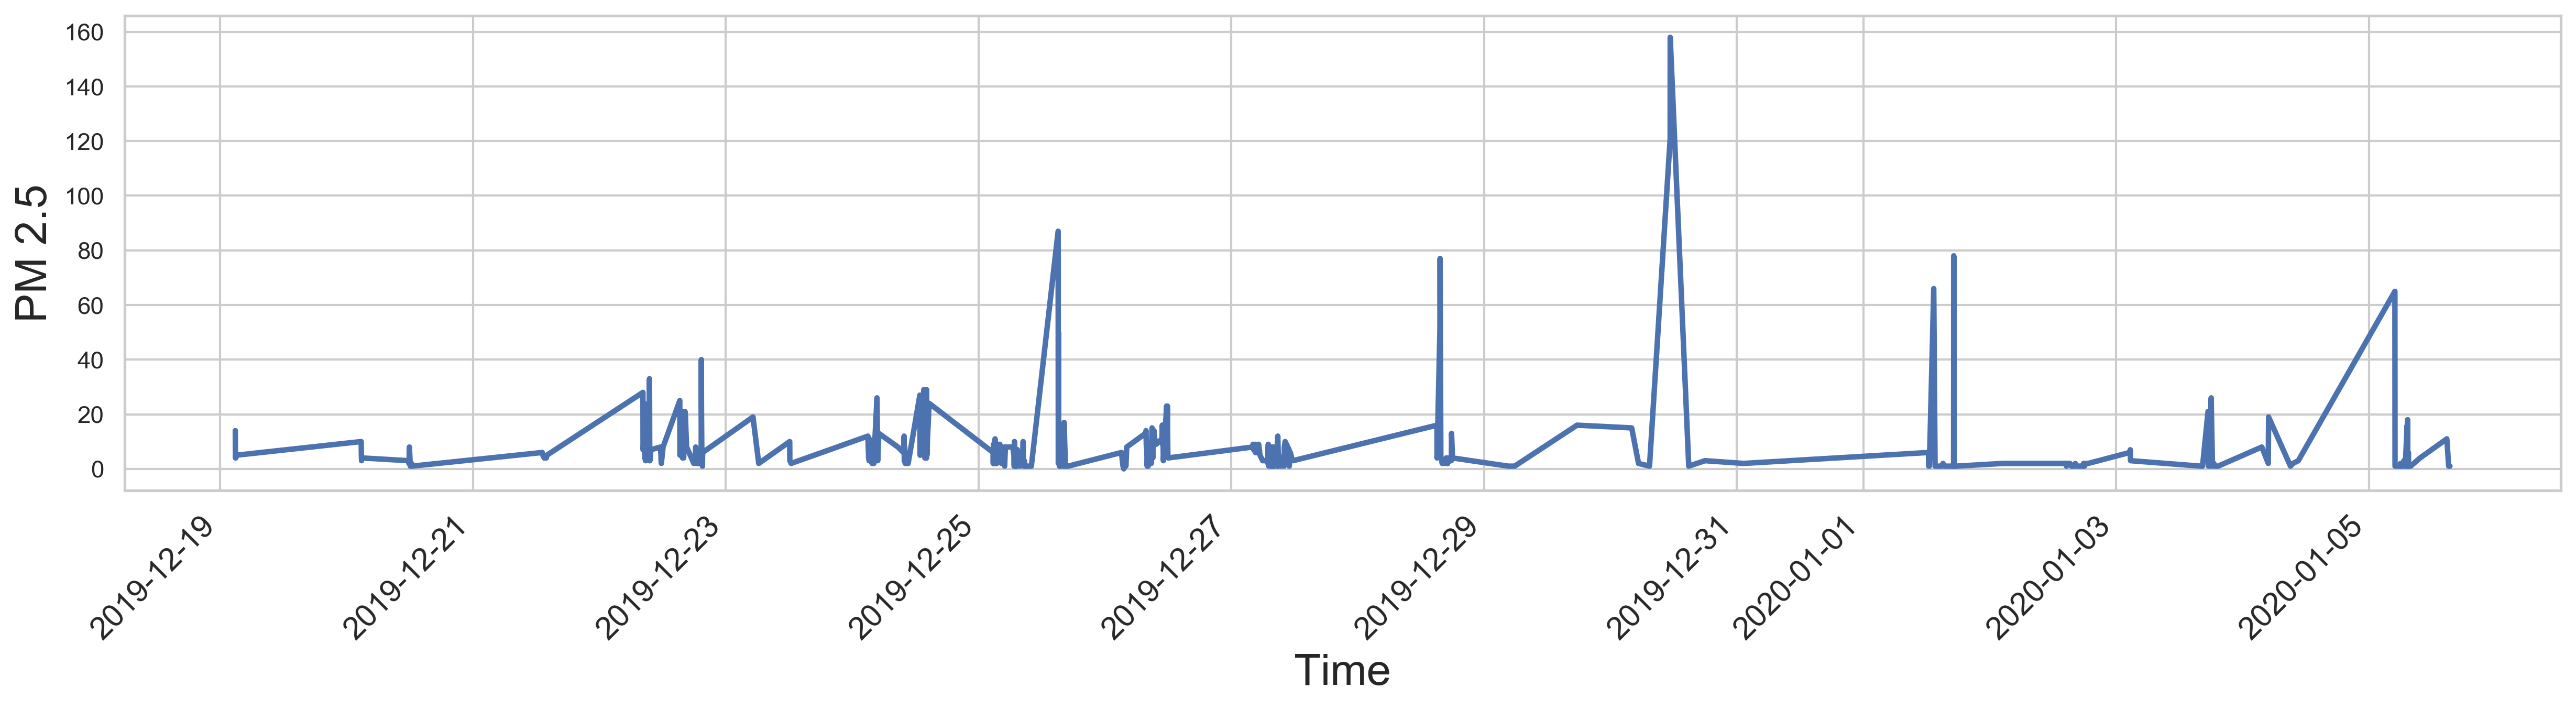

In [11]:
sns.set(style="whitegrid")
plt.figure(figsize=(20,4), dpi=300)
plt.xticks(
    rotation=45,
    horizontalalignment='right',
    fontweight='light',
    fontsize='large'
)
chart = sns.lineplot(x=df.index, y=df['pm25'], palette="tab10", linewidth=2.5)
chart.set_xlabel("Time", fontsize=20)
chart.set_ylabel("PM 2.5", fontsize=20)
# chart.set(xlabel='Date', ylabel='PM 2.5')
# plt.show()

# location

In [12]:
r_l = requests.get(url = URL_LOCATION)
data_l = r_l.json()

In [13]:
arr_data = []

for key in data_l.keys():
    try:
        arr_data.append({
            "lat" : data_l[key]['latitude'],
            "lng" : data_l[key]['longtitude'],
            "time": data_l[key]['timestamp'],
        })
    except:
        None
print(arr_data)

[{'lat': 13.852349, 'lng': 100.582487, 'time': '2019-12-15T08:57:43.547+07:00'}, {'lat': 13.8523033, 'lng': 100.5825052, 'time': '2019-12-15T16:49:23.948+07:00'}, {'lat': 13.8523124, 'lng': 100.5825392, 'time': '2019-12-15T23:34:04.227+07:00'}, {'lat': 13.8523074, 'lng': 100.5825329, 'time': '2019-12-16T07:12:48.853+07:00'}, {'lat': 13.8523492, 'lng': 100.5825133, 'time': '2019-12-16T14:35:58.483+07:00'}, {'lat': 13.8523164, 'lng': 100.582543, 'time': '2019-12-16T21:43:13.947+07:00'}, {'lat': 13.8523419, 'lng': 100.5825251, 'time': '2019-12-17T08:12:32.329+07:00'}, {'lat': 13.8523153, 'lng': 100.5825469, 'time': '2019-12-17T13:29:33.285+07:00'}, {'lat': 13.8523319, 'lng': 100.5826179, 'time': '2019-12-17T20:10:47.477+07:00'}, {'lat': 13.8523368, 'lng': 100.5825252, 'time': '2019-12-18T07:13:22.128+07:00'}, {'lat': 13.8523182, 'lng': 100.582545, 'time': '2019-12-18T14:44:12.382+07:00'}, {'lat': 13.8522388, 'lng': 100.5826252, 'time': '2019-12-18T21:03:22.242+07:00'}, {'lat': 13.8521906,

In [14]:
df = pd.DataFrame(arr_data)
df.tail()

lat         lng                           time
42  13.852500  100.582391  2019-12-29T16:00:04.140+07:00
43  13.852208  100.582332  2019-12-30T00:00:03.786+07:00
44  13.852207  100.582447  2019-12-30T08:00:03.432+07:00
45  13.852533  100.582370  2019-12-30T16:00:03.224+07:00
46  13.852295  100.582385  2019-12-31T00:00:03.188+07:00

(100.5821939, 100.5827874, 13.852079, 13.8526657)


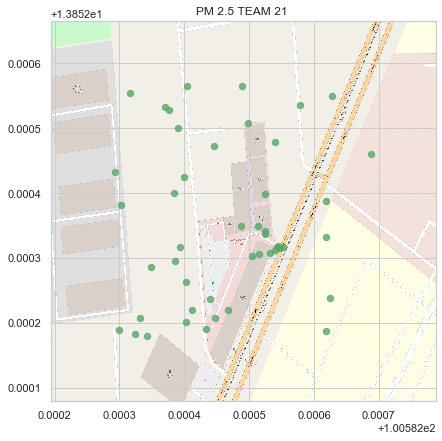

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
BBox=(100.5821939, 100.5827874,13.852079, 13.8526657)
ruh_m =plt.imread('map.png')
fig, ax = plt.subplots(figsize = (8,7))
ax.scatter(df.lng, df.lat, zorder=1, alpha= 0.8, c='g', s=40)
ax.set_title('PM 2.5 TEAM 21 ')
print(BBox)
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(ruh_m, zorder=0, extent = BBox, aspect= 'equal')

# analyze sensor + location

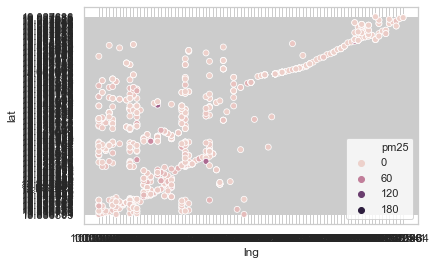

In [16]:
ax = sns.scatterplot(x="lng", y="lat", hue="pm25",data=data_sensor)

In [17]:
df['time'] = df['time'].str[:10]

In [19]:
df.time.unique()

array(['2019-12-15', '2019-12-16', '2019-12-17', '2019-12-18',
       '2019-12-19', '2019-12-20', '2019-12-21', '2019-12-22',
       '2019-12-23', '2019-12-24', '2019-12-25', '2019-12-26',
       '2019-12-27', '2019-12-28', '2019-12-29', '2019-12-30',
       '2019-12-31'], dtype=object)

In [27]:
new_data_l = df

In [28]:
new_data_l.drop_duplicates(['time'], keep='last')

lat         lng        time
2   13.852312  100.582539  2019-12-15
5   13.852316  100.582543  2019-12-16
8   13.852332  100.582618  2019-12-17
11  13.852239  100.582625  2019-12-18
14  13.852264  100.582403  2019-12-19
17  13.852316  100.582394  2019-12-20
20  13.852425  100.582399  2019-12-21
23  13.852473  100.582446  2019-12-22
24  13.852287  100.582349  2019-12-23
27  13.852220  100.582467  2019-12-24
30  13.852219  100.582412  2019-12-25
33  13.852566  100.582489  2019-12-26
36  13.852507  100.582498  2019-12-27
39  13.852401  100.582384  2019-12-28
42  13.852500  100.582391  2019-12-29
45  13.852533  100.582370  2019-12-30
46  13.852295  100.582385  2019-12-31

In [29]:
new_data_s = data_sensor

In [47]:
# new_data_s.drop_duplicates(['date'], keep='last')
# new_data_s.drop(columns=['lat','lng','time'])

In [46]:
#     result = pd.merge(new_data_l,
#                      new_data_s[['date', 'isoTime', 'pm25']],
#                      on='time')
#     result.head()